## 4. Basics of Device Fabrication
### 4.1 Fabrication Processes
### 4.1.1 Oxidation
### Richard C.Jaeger, Modular serieses Volume V Introduction to Microelectronic Fabrication, Auburn University

**Deal-Grove Relation**
$$t_{ox}^2+At_{ox}=B(t+\tau) $$
$$\tau =\frac{t_{ini}^2+At_{ini}}{B} $$
a root formula
$$t_{ox}=\frac{A}{2}\sqrt{1+\frac{4B}{A^2}(t+\tau)}-1$$

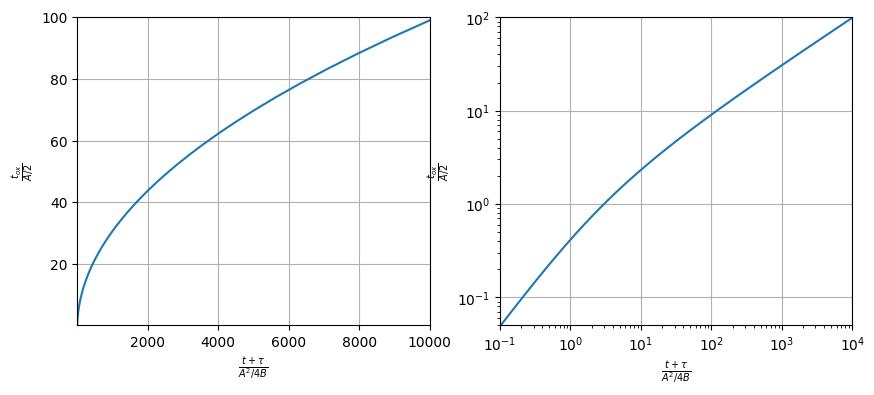

In [4]:
# tox/(A/2) vs (t+tau)/(A^2/4B) y=sqrt(1+x)-1 graph
import numpy as np, matplotlib.pyplot as plt
x=np.logspace(-1,4,101)
y=np.sqrt(1+x)-1

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(x,y)
plt.xlim(0.1,1e4), plt.ylim(5e-2,100), plt.xlabel(r"$\frac{t+\tau}{A^2/4B}$"), plt.ylabel(r"$\frac{t_{ox}}{A/2}$")
plt.grid(True)
plt.subplot(122)
plt.loglog(x,y,)
plt.xlim(0.1,1e4), plt.ylim(5e-2,100), plt.xlabel(r"$\frac{t+\tau}{A^2/4B}$"), plt.ylabel(r"$\frac{t_{ox}}{A/2}$")
plt.grid(True)
plt.show()

**Arrhenius relationship**\

parabolic constant B=C1exp(-E1/(kT))\
linear constant B/A=C2exp(-E2/(kT))\
<100> DryO2 C1=7.72e2um2/hr, E1=1.23eV, C2=3.71e6um/hr, E2=2.00eV, Tini=25nm\
<100> WetO2 C1=3.86e2um2/hr, E1=0.78eV, C2=0.97e8um/hr, E2=2.05eV

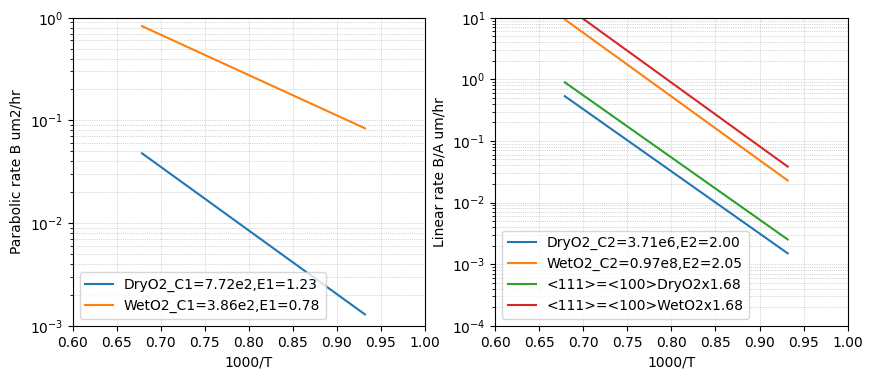

In [94]:
# <100> Factors influencing oxidation rate
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,e_ox
import numpy as np, matplotlib.pyplot as plt

DryO2_C1=7.72e2; DryO2_E1=1.23; DryO2_C2=3.71e6; DryO2_E2=2.00
WetO2_C1=3.86e2; WetO2_E1=0.78; WetO2_C2=0.97e8; WetO2_E2=2.05

T=np.linspace(800+273,1200+273,11)
DryO2_B=DryO2_C1*np.exp(-DryO2_E1/(k*T))
WetO2_B=WetO2_C1*np.exp(-WetO2_E1/(k*T))
DryO2_BoverA=DryO2_C2*np.exp(-DryO2_E2/(k*T))
WetO2_BoverA=WetO2_C2*np.exp(-WetO2_E2/(k*T))

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.semilogy(1000/T,DryO2_B,label="DryO2_C1=7.72e2,E1=1.23")
plt.semilogy(1000/T,WetO2_B,label="WetO2_C1=3.86e2,E1=0.78")
plt.xlim(0.6,1.0), plt.ylim(0.001,1), plt.xlabel("1000/T"), plt.ylabel("Parabolic rate B um2/hr")
plt.grid(True, which='both', linestyle=':', linewidth=0.5), plt.legend()

plt.subplot(122)
plt.semilogy(1000/T,DryO2_BoverA,label="DryO2_C2=3.71e6,E2=2.00")
plt.semilogy(1000/T,WetO2_BoverA,label="WetO2_C2=0.97e8,E2=2.05")
plt.semilogy(1000/T,DryO2_BoverA*1.68,label="<111>=<100>DryO2x1.68")
plt.semilogy(1000/T,WetO2_BoverA*1.68,label="<111>=<100>WetO2x1.68")
plt.xlim(0.6,1.0), plt.ylim(1e-4,10), plt.xlabel("1000/T"), plt.ylabel("Linear rate B/A um/hr")
plt.grid(True, which='both', linestyle=':', linewidth=0.5), plt.legend()

plt.show()

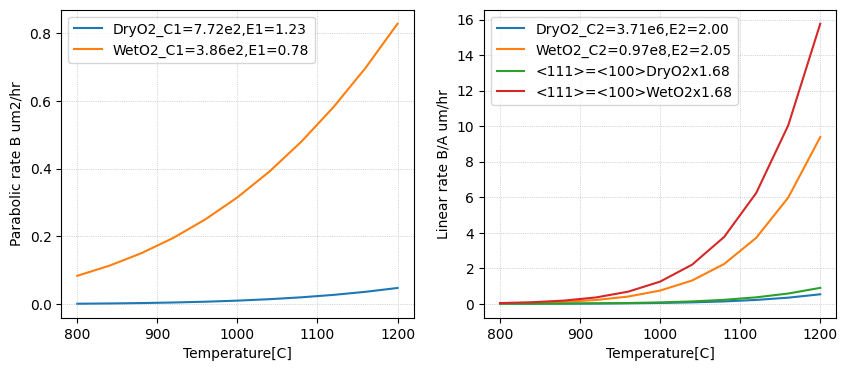

In [9]:
# <100> Factors influencing oxidation rate
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,e_ox
import numpy as np, matplotlib.pyplot as plt

DryO2_C1=7.72e2; DryO2_E1=1.23; DryO2_C2=3.71e6; DryO2_E2=2.00
WetO2_C1=3.86e2; WetO2_E1=0.78; WetO2_C2=0.97e8; WetO2_E2=2.05

T=np.linspace(800+273,1200+273,11)
DryO2_B=DryO2_C1*np.exp(-DryO2_E1/(k*T))
WetO2_B=WetO2_C1*np.exp(-WetO2_E1/(k*T))
DryO2_BoverA=DryO2_C2*np.exp(-DryO2_E2/(k*T))
WetO2_BoverA=WetO2_C2*np.exp(-WetO2_E2/(k*T))

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(T-273,DryO2_B,label="DryO2_C1=7.72e2,E1=1.23")
plt.plot(T-273,WetO2_B,label="WetO2_C1=3.86e2,E1=0.78")
#plt.xlim(0.6,1.0), plt.ylim(0.001,1), 
plt.xlabel("Temperature[C]"), plt.ylabel("Parabolic rate B um2/hr")
plt.grid(True, which='both', linestyle=':', linewidth=0.5), plt.legend()

plt.subplot(122)
plt.plot(T-273,DryO2_BoverA,label="DryO2_C2=3.71e6,E2=2.00")
plt.plot(T-273,WetO2_BoverA,label="WetO2_C2=0.97e8,E2=2.05")
plt.plot(T-273,DryO2_BoverA*1.68,label="<111>=<100>DryO2x1.68")
plt.plot(T-273,WetO2_BoverA*1.68,label="<111>=<100>WetO2x1.68")
#plt.xlim(0.6,1.0), plt.ylim(1e-4,10), 
plt.xlabel("Temperature[C]"), plt.ylabel("Linear rate B/A um/hr")
plt.grid(True, which='both', linestyle=':', linewidth=0.5), plt.legend()

plt.show()

$$t_{ox}^2+At_{ox}=B(t+\tau) $$
$$\tau =\frac{t_{ini}^2+At_{ini}}{B} $$
a root formula
$$t_{ox}=\frac{A}{2}\left(\sqrt{1+\frac{4B}{A^2}(t+\tau)}-1\right)$$



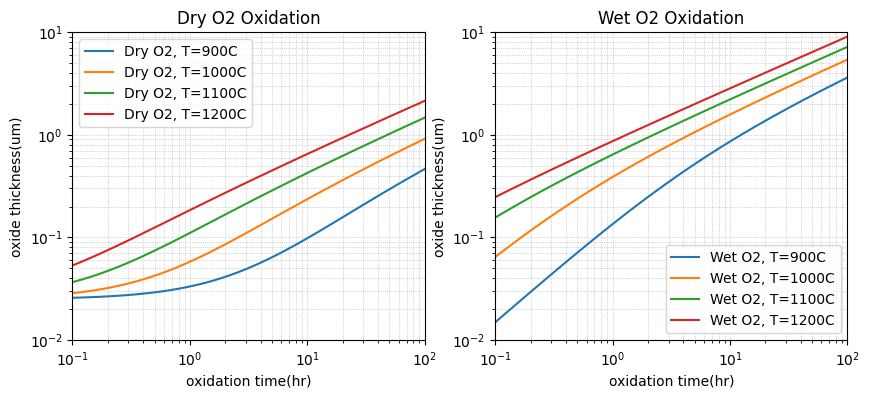

In [14]:
# <100> Factors influencing oxidation rate
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,e_ox
import numpy as np, matplotlib.pyplot as plt

DryO2_C1=7.72e2; DryO2_E1=1.23; DryO2_C2=3.71e6; DryO2_E2=2.00
WetO2_C1=3.86e2; WetO2_E1=0.78; WetO2_C2=0.97e8; WetO2_E2=2.05

T=[temp+273 for temp in [900, 1000, 1100, 1200]]
time=np.logspace(-1,2,101)

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.title("Dry O2 Oxidation")
for i in range(len(T)):
    kT=k*T[i]
    DryO2_B=DryO2_C1*np.exp(-DryO2_E1/(kT))
    DryO2_BoverA=DryO2_C2*np.exp(-DryO2_E2/(kT))
    DryO2_A=DryO2_B/DryO2_BoverA
    tini=25e-3
    tau=(tini**2+DryO2_A*tini)/DryO2_B
    
    tox_Dry=DryO2_A/2*(np.sqrt(1+4*DryO2_B/DryO2_A**2*(time+tau))-1)
    
    plt.loglog(time,tox_Dry,label=f"Dry O2, T={T[i]-273}C")
plt.xlim(0.1,100), plt.ylim(1e-2,10), plt.xlabel("oxidation time(hr)"), plt.ylabel("oxide thickness(um)")
plt.grid(True, which='both', linestyle=':', linewidth=0.5), plt.legend()


plt.subplot(122)
plt.title("Wet O2 Oxidation")
for i in range(len(T)):
    kT=k*T[i]
    WetO2_B=WetO2_C1*np.exp(-WetO2_E1/(kT))
    WetO2_BoverA=WetO2_C2*np.exp(-WetO2_E2/(kT))
    WetO2_A=WetO2_B/WetO2_BoverA
    
    tox_Wet=WetO2_A/2*(np.sqrt(1+4*WetO2_B/WetO2_A**2*(time+0))-1)
    
    plt.loglog(time,tox_Wet,label=f"Wet O2, T={T[i]-273}C")
plt.xlim(0.1,100), plt.ylim(1e-2,10), plt.xlabel("oxidation time(hr)"), plt.ylabel("oxide thickness(um)")
plt.grid(True, which='both', linestyle=':', linewidth=0.5), plt.legend()
plt.show()

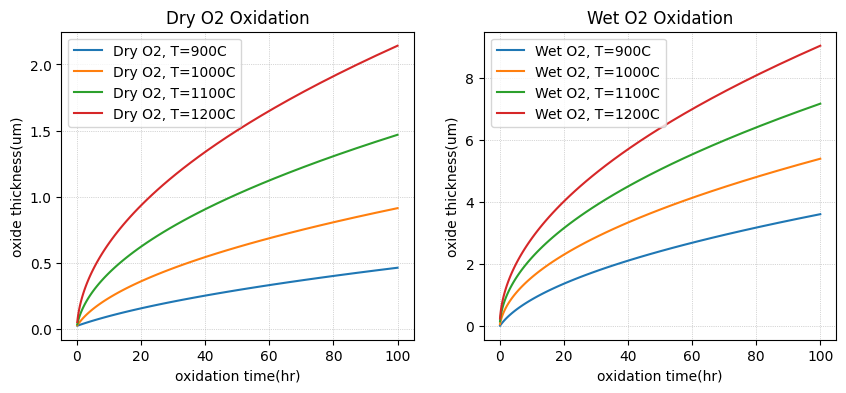

In [16]:
# <100> Factors influencing oxidation rate
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,e_ox
import numpy as np, matplotlib.pyplot as plt

DryO2_C1=7.72e2; DryO2_E1=1.23; DryO2_C2=3.71e6; DryO2_E2=2.00
WetO2_C1=3.86e2; WetO2_E1=0.78; WetO2_C2=0.97e8; WetO2_E2=2.05

T=[temp+273 for temp in [900, 1000, 1100, 1200]]
time=np.logspace(-1,2,101)

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.title("Dry O2 Oxidation")
for i in range(len(T)):
    kT=k*T[i]
    DryO2_B=DryO2_C1*np.exp(-DryO2_E1/(kT))
    DryO2_BoverA=DryO2_C2*np.exp(-DryO2_E2/(kT))
    DryO2_A=DryO2_B/DryO2_BoverA
    tini=25e-3
    tau=(tini**2+DryO2_A*tini)/DryO2_B
    
    tox_Dry=DryO2_A/2*(np.sqrt(1+4*DryO2_B/DryO2_A**2*(time+tau))-1)
    
    plt.plot(time,tox_Dry,label=f"Dry O2, T={T[i]-273}C")
#plt.xlim(0.1,100), plt.ylim(1e-2,10), 
plt.xlabel("oxidation time(hr)"), plt.ylabel("oxide thickness(um)")
plt.grid(True, which='both', linestyle=':', linewidth=0.5), plt.legend()


plt.subplot(122)
plt.title("Wet O2 Oxidation")
for i in range(len(T)):
    kT=k*T[i]
    WetO2_B=WetO2_C1*np.exp(-WetO2_E1/(kT))
    WetO2_BoverA=WetO2_C2*np.exp(-WetO2_E2/(kT))
    WetO2_A=WetO2_B/WetO2_BoverA
    
    tox_Wet=WetO2_A/2*(np.sqrt(1+4*WetO2_B/WetO2_A**2*(time+0))-1)
    
    plt.plot(time,tox_Wet,label=f"Wet O2, T={T[i]-273}C")
#plt.xlim(0.1,100), plt.ylim(1e-2,10), 
plt.xlabel("oxidation time(hr)"), plt.ylabel("oxide thickness(um)")
plt.grid(True, which='both', linestyle=':', linewidth=0.5), plt.legend()
plt.show()

### Diffusion
### S.Wolf and R.N.Tauber, Silicon Processing for The VLSI Era Volum 1: Process Technology
Diffusivity\
Do(cm2/sec): Diffusion Coefficient extrapolated infinite temperature\
Ea(eV): Diffusion Activation energy\
k: Boltzmann Constant(8.62e-5 eV/T)\
T: absolute temperature\

Do_Sii=4000; Ea_Si=5.0 #Si(interstitial, self-diffusion)\
Do_Siv=40; Ea_Siv=4.6 #Si(vacancy, self-diffusion)\
Do_Al=0.14; Ea_Al=3.41 #Do cm2/sec, Ea eV\
Do_B=0.76; Ea_B=3.46\
Do_Ga=0.37; Ea_Ga=3.39\
Do_In=0.79; Ea_In=3.63\
Do_Bi=1.08; Ea_Bi=3.85\
Do_As=22.9; Ea_As=4.10\
Do_P=3.85; Ea_P=3.66\
Do_Sb=0.214; Ea_Sb=3.65


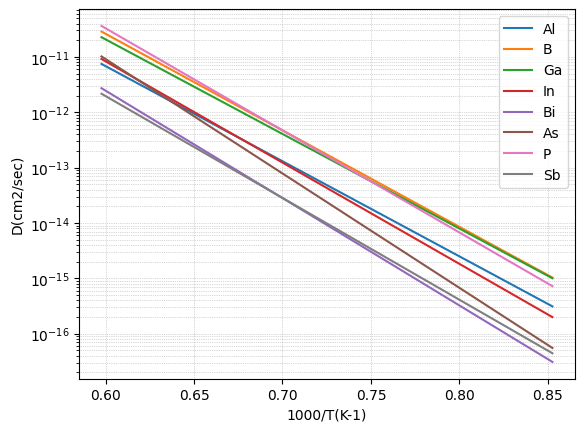

In [35]:
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,e_ox
import numpy as np, matplotlib.pyplot as plt

Do_Al=0.14; Ea_Al=3.41 #Do cm2/sec, Ea eV
Do_B=0.76; Ea_B=3.46
Do_Ga=0.37; Ea_Ga=3.39
Do_In=0.79; Ea_In=3.63
Do_Bi=1.08; Ea_Bi=3.85
Do_As=22.9; Ea_As=4.10
Do_P=3.85; Ea_P=3.66
Do_Sb=0.214; Ea_Sb=3.65

T=np.linspace(900+273,1400+273,11)
D_Al=Do_Al*np.exp(-Ea_Al/(k*T))
D_B=Do_B*np.exp(-Ea_B/(k*T))
D_Ga=Do_Ga*np.exp(-Ea_Ga/(k*T))
D_In=Do_In*np.exp(-Ea_In/(k*T))
D_Bi=Do_Bi*np.exp(-Ea_Bi/(k*T))
D_As=Do_As*np.exp(-Ea_As/(k*T))
D_P=Do_P*np.exp(-Ea_P/(k*T))
D_Sb=Do_Sb*np.exp(-Ea_Sb/(k*T))

plt.semilogy(1000/T,D_Al,label="Al")
plt.semilogy(1000/T,D_B,label="B")
plt.semilogy(1000/T,D_Ga,label="Ga")
plt.semilogy(1000/T,D_In,label="In")
plt.semilogy(1000/T,D_Bi,label="Bi")
plt.semilogy(1000/T,D_As,label="As")
plt.semilogy(1000/T,D_P,label="P")
plt.semilogy(1000/T,D_Sb,label="Sb")

plt.xlabel("1000/T(K-1)"), plt.ylabel("D(cm2/sec)")
plt.grid(True, which='both', linestyle=':', linewidth=0.5), plt.legend()
plt.show()

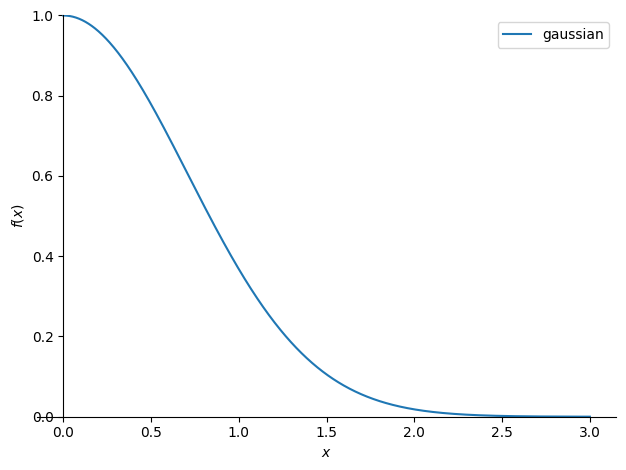

In [44]:
from sympy import symbols, exp
from sympy.plotting import plot
x,y,z,t = symbols('x,y,z,t')

p = plot(exp(-x**2), (x, 0, 3), ylim=(0, 1), label="gaussian", show=False)
p.legend = True
p.show()


erfc(x)는 보완 오류 함수(Complementary Error Function) 로, 다음과 같이 정의됩니다:
$$erfc(x)=1-erf(x) $$
$$erf(x)=\frac{2}{\sqrt{\pi}}\int_0^x e^{-t^2}dt $$
$$erfc(x)=\frac{2}{\sqrt{\pi}}\int_x^\infty e^{-t^2}dt $$

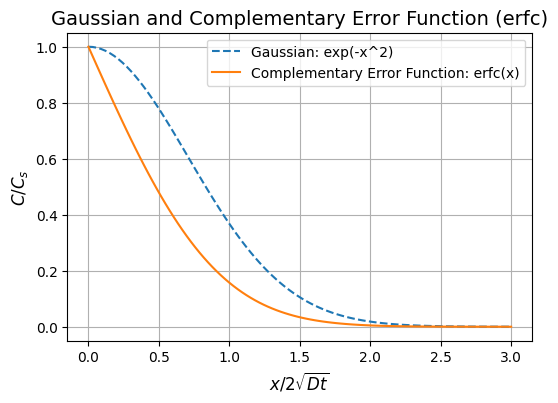

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

# erfc 함수 정의 (적분 사용)
def erfc_integral(x):
    result, _ = integrate.quad(lambda t: np.exp(-t**2), x, np.inf)
    return (2 / np.sqrt(np.pi)) * result

# x 값 생성
x_values = np.linspace(0, 3, 100)

# Gaussian과 erfc 값 계산
gaussian_values = np.exp(-x_values**2)
erfc_values = np.array([erfc_integral(x) for x in x_values])
#x_values의 각 요소에 대해 erfc_integral(x)을 실행한 후, 리스트를 np.array()로 변환합니다.
#간단하고 직관적이어서 가장 추천하는 방법입니다.
#erfc_values = erfc_integral(x_value) #오류 발생 (x_values는 배열)

plt.figure(figsize=(6, 4))
plt.plot(x_values, gaussian_values, label="Gaussian: exp(-x^2)", linestyle="--")
plt.plot(x_values, erfc_values, label="Complementary Error Function: erfc(x)")

plt.xlabel(r'$x / 2\sqrt{Dt}$', fontsize=12), plt.ylabel(r'$C / C_s$', fontsize=12)
plt.title("Gaussian and Complementary Error Function (erfc)", fontsize=14)
plt.legend(), plt.grid(True)
plt.show()


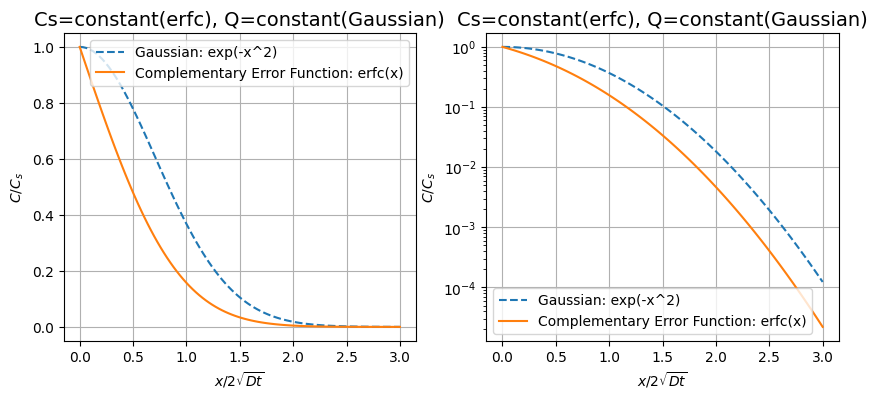

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc

# 변수 설정
x = np.linspace(0, 3, 100)  # x / 2sqrt(Dt) 값
gaussian = np.exp(-x**2)  # Gaussian 함수
complementary_error_function = erfc(x)  # Complementary Error Function (erfc) erfc=1-erf

# 그래프 설정
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(x, gaussian, label="Gaussian: exp(-x^2)", linestyle="--")
plt.plot(x, complementary_error_function, label="Complementary Error Function: erfc(x)")
plt.xlabel(r'$x / 2\sqrt{Dt}$'), plt.ylabel(r'$C / C_s$')
plt.title("Cs=constant(erfc), Q=constant(Gaussian)", fontsize=14)
plt.legend(), plt.grid(True)

plt.subplot(122)
plt.semilogy(x, gaussian, label="Gaussian: exp(-x^2)", linestyle="--")
plt.semilogy(x, complementary_error_function, label="Complementary Error Function: erfc(x)")
plt.xlabel(r'$x / 2\sqrt{Dt}$'), plt.ylabel(r'$C / C_s$')
plt.title("Cs=constant(erfc), Q=constant(Gaussian)", fontsize=14)
plt.legend(), plt.grid(True)
plt.show()


**S.M.SZE Semiconductor Devices physics and technology**\
**A.S.Grove Physics and Technology of Semiconductor Devices**\

Diffusion and ion implantation page 388
$$C(x,t)=\frac{S}{\sqrt{\pi Dt}}exp\left[-\frac{x^2}{4Dt} \right] $$
$$C(x,t)=C_s erfc\left[\frac{x}{2\sqrt{Dt}} \right] $$

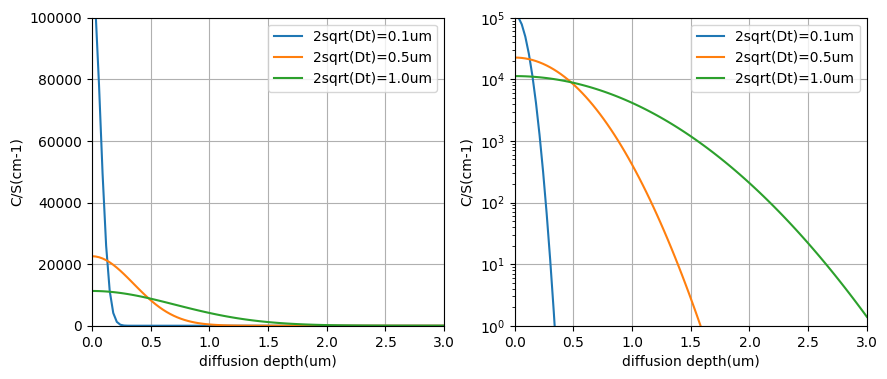

In [46]:
# Constant Total Dopant Diffusion - Gaussian distribution
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc

# K=2sqrt(Dt), Dt=(K/2)**2, 4Dt=K**2
K=[0.1, 0.5, 1.0]
x = np.linspace(0,3,100)

plt.figure(figsize=(10,4))
for i in range(len(K)):
    CoverS = 1/np.sqrt(np.pi*(K[i]/2)**2)*np.exp(-(x/K[i])**2)*1e4
    plt.subplot(121)
    plt.plot(x, CoverS, label=f"2sqrt(Dt)={K[i]}um")
    plt.xlim(0,3), plt.ylim(0,1e5), plt.xlabel("diffusion depth(um)"), plt.ylabel("C/S(cm-1)")
    plt.legend(), plt.grid(True)
    
    plt.subplot(122)
    plt.semilogy(x, CoverS, label=f"2sqrt(Dt)={K[i]}um")
    plt.xlim(0,3), plt.ylim(1,1e5), plt.xlabel("diffusion depth(um)"), plt.ylabel("C/S(cm-1)")
plt.legend(), plt.grid(True)
plt.show()

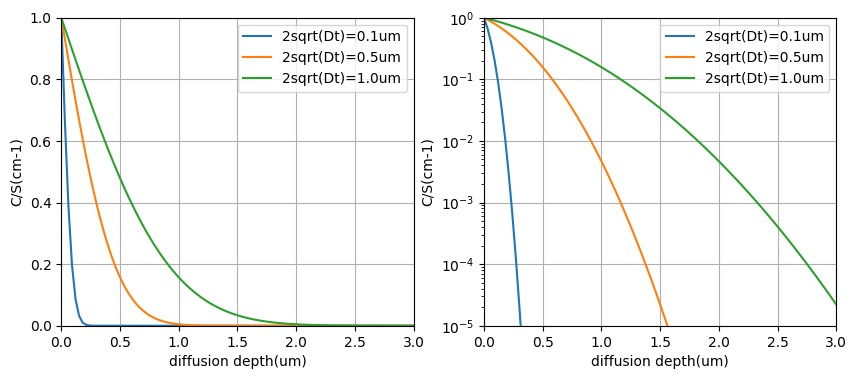

In [51]:
# Constant Surface Concentration Diffusion - Error complement distribution
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc

# K=2sqrt(Dt), Dt=(K/2)**2, 4Dt=K**2
K=[0.1, 0.5, 1.0]
x = np.linspace(0,3,100)

plt.figure(figsize=(10,4))
for i in range(len(K)):
    CoverS = erfc(x/K[i])
    plt.subplot(121)
    plt.plot(x, CoverS, label=f"2sqrt(Dt)={K[i]}um")
    plt.xlim(0,3), plt.ylim(0,1), plt.xlabel("diffusion depth(um)"), plt.ylabel("C/S(cm-1)")
    plt.legend(), plt.grid(True)
    
    plt.subplot(122)
    plt.semilogy(x, CoverS, label=f"2sqrt(Dt)={K[i]}um")
    plt.xlim(0,3), plt.ylim(1e-5,1), plt.xlabel("diffusion depth(um)"), plt.ylabel("C/S(cm-1)")
plt.legend(), plt.grid(True)
plt.show()

### Epitaxial Growth
### S.M.SZE Semiconductor Devices physics and technology 
$$C(x',t)=\frac{C_2}{2}\left[erfc\left[\frac{x'-vt}{2\sqrt{D_2 t}} \right]+exp\left[\frac{vx'}{D_2} \right]erfc\left[\frac{x'+vt}{2\sqrt{D_2 t}} \right]\right]+\frac{C_1}{2}\left[1+erf\left[\frac{x'-vt}{2\sqrt{D_1 t}} \right] \right]$$

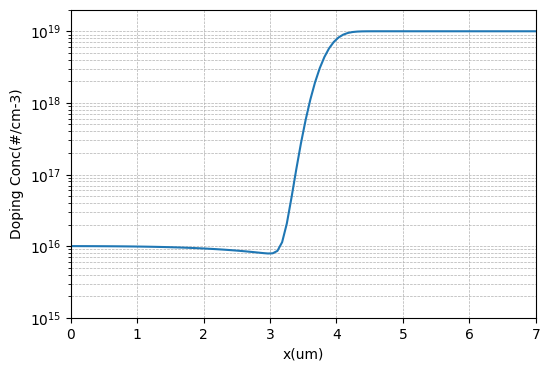

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc,erf

x = np.linspace(0, 7, 100)  # x / 2sqrt(Dt) 값
T=900 #degreeC
t=5.5 #min
v=0.7 #um/min
C1=1e19 #cm-3
C2=1e16 
#D1=6e-13 #cm2/sec
#D2=4e-11 #cm2/sec
D1 = 3.6e-3  # µm²/min 1cm=1e4um, 1min=60sec, 1cm2/sec=1e8um2/s=6e9um2/min, 6e-13 * 6e9=um2/min
D2 = 0.24    # µm²/min 1cm=1e4um, 1min=60sec, 1cm2/sec=1e8um2/s=6e9um2/min, 4e-11 * 6e9um2/min

DopingC=C2/2*(erfc((x-v*t)/(2*np.sqrt(D2*t)))+np.exp(v*x/D2)*erfc((x+v*t)/(2*np.sqrt(D2*t)))
             )+C1/2*(1+erf((x-v*t)/(2*np.sqrt(D1*t))))

plt.figure(figsize=(6, 4))
plt.semilogy(x,DopingC)
plt.xlim(0,7), plt.ylim(1e15,2e19), plt.xlabel("x(um)"), plt.ylabel("Doping Conc(#/cm-3)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

### 3.1.4 Resistivity
$$\varepsilon=\rho J$$
$$J=\sigma \varepsilon =\frac{1}{\rho}\varepsilon$$
$$J_drift=J_{N|drift}+J_{P|drift}=q(\mu_n n+\mu_p p)\varepsilon$$
$$\rho=\frac{1}{q(\mu_n n+\mu_p p)}$$
$$ n-type, \rho_n=\frac{1}{q\mu_n N_D}$$
$$ p-type, \rho_p=\frac{1}{q\mu_p N_A}$$
$$ intrinsic,\ \rho_{intrinsic}=\frac{1}{q(\mu_n+\mu_p)n_i}$$
$$ max,\ \rho_{max}=\frac{1}{2q\sqrt{\mu_n \mu_p}\ n_i}$$

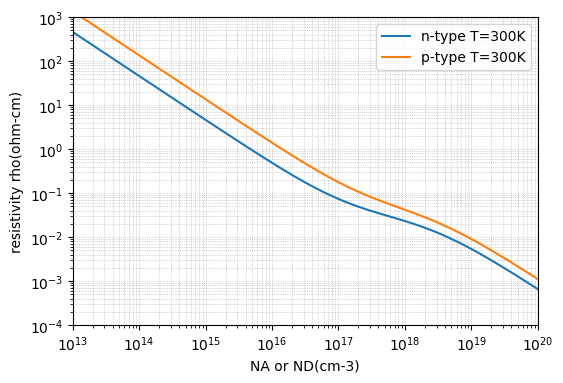

In [1]:
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup
import numpy as np, matplotlib.pyplot as plt

T=300
NB=np.logspace(13,20,101)
rhon=1/(q*mun(T,NB)*NB)
rhop=1/(q*mup(T,NB)*NB)

plt.figure(figsize=(6,4))
plt.loglog(NB,rhon,label="n-type T=300K")
plt.loglog(NB,rhop,label="p-type T=300K")
plt.xlim(1e13, 1e20), plt.ylim(1e-4,1e3)
plt.xlabel("NA or ND(cm-3)"), plt.ylabel("resistivity rho(ohm-cm)")
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.legend()
plt.show()

#### ion implantation Gaussian distribution
**S.Wolf and R.N.Tauber, Silicon Processing for The VLSI Era Volum 1: Process Technology page 248**

$$n(x)=\frac{Q}{\sqrt{2\pi}\Delta R_p}exp\left[-\frac{(x-R_p)^2}{2\Delta R_p^2} \right]$$
$$\Delta Rp_{diff}=\sqrt{\Delta Rp^2+2*Dt}$$
$$n(x)_diff=\frac{Q}{\sqrt{2\pi}\Delta Rp_{diff}}exp\left[-\frac{(x-R_p)^2}{2\Delta Rp_{diff}^2} \right]$$

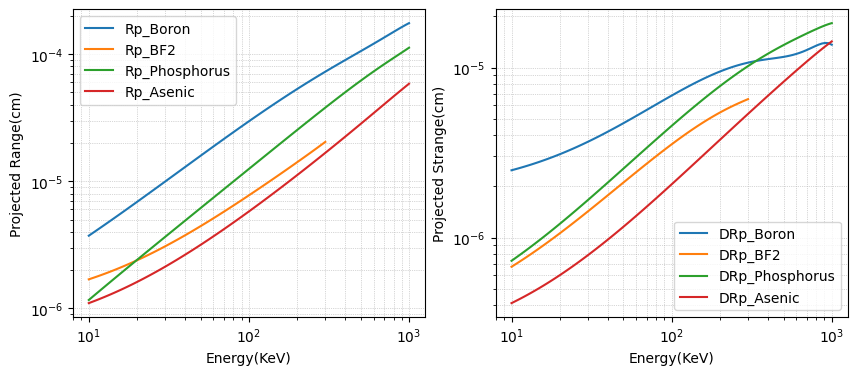

In [36]:
# Rp, DRp
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,e_ox
import numpy as np, matplotlib.pyplot as plt

E=np.logspace(1,3,100)
E_bf=np.logspace(1,np.log10(300),100)
# Boron
Rp_B=(51.051+32.60883*E-0.03837*E**2+3.758e-5*E**3-1.433e-8*E**4)*1e-8
DRp_B=(185.34201+6.5308*E-0.01745*E**2+2.098e-5*E**3-8.884e-9*E**4)*1e-8
# Bf2
Rp_Bf=(5.544e-10*E_bf**3-3.670e-7*E_bf**2+7.076e-4*E_bf+9.900e-3)*1e-4
DRp_Bf=(9.200e-10*E_bf**3-9.591e-7*E_bf**2+4.133e-4*E_bf+2.702e-3)*1e-4
# Phosphorus
Rp_P=(-7.14745+12.33417*E+0.00323*E**2-8.086e-6*E**3+3.766e-9*E**4)*1e-8
DRp_P=(24.39576+4.93641*E-0.00697*E**2+5.858e-6*E**3-2.024e-9*E**4)*1e-8
# As
Rp_As=(58.87725+5.11177*E+0.0008995*E**2+1.173e-7*E**3-3.344e-10*E**4)*1e-8
DRp_As=(22.12602+1.91541*E-0.0008444*E**2+5.637e-7*E**3-2.322e-10*E**4)*1e-8

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.loglog(E,Rp_B, label="Rp_Boron")
plt.loglog(E_bf,Rp_Bf, label="Rp_BF2")
plt.loglog(E,Rp_P, label="Rp_Phosphorus")
plt.loglog(E,Rp_As, label="Rp_Asenic")
plt.xlabel("Energy(KeV)"), plt.ylabel("Projected Range(cm)")
plt.grid(True, which='both', linestyle=':', linewidth=0.5), plt.legend()

plt.subplot(122)
plt.loglog(E,DRp_B, label="DRp_Boron")
plt.loglog(E_bf,DRp_Bf, label="DRp_BF2")
plt.loglog(E,DRp_P, label="DRp_Phosphorus")
plt.loglog(E,DRp_As, label="DRp_Asenic")
plt.xlabel("Energy(KeV)"), plt.ylabel("Projected Strange(cm)")
plt.grid(True, which='both', linestyle=':', linewidth=0.5), plt.legend()
plt.show()


Rp(um)=0.216um, DRp=0.056um
D_B1=6.883e-13cm2/sec, D_B2=1.513e-13cm2/sec
Cpeak=3.681e+18/cm3
Cs_imp=1.403e+15cm-3, Cs_diff=2.407e+17cm-3
Xj: 2.798μm
max_conc_imp:3.680e+18/cm3, max_conc_diff:2.490e+17/cm3


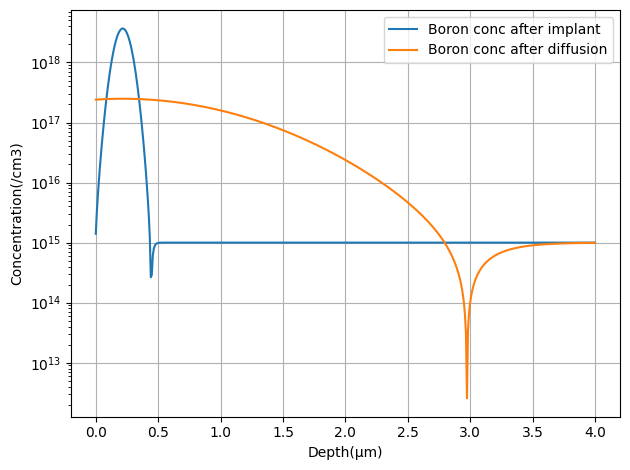

In [27]:
### Source; Boron
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,e_ox
import numpy as np, matplotlib.pyplot as plt

# Boron implantation
E=70; 
Q=5.2e13 # #/cm2
NB=1e15 # N-type phosphorus #/cm3

Rp=(51.051+32.60883*E-0.03837*E**2+3.758e-5*E**3-1.433e-8*E**4)*1e-8
DRp=(185.34201+6.5308*E-0.017545*E**2+2.098e-5*E**3-8.884e-9*E**4)*1e-8
print("Rp(um)=%0.3fum, DRp=%0.3fum" % (Rp*1e4,DRp*1e4))

# Diffusion Temp=DegreeC, Time=min 
# well drive-in, jfet drive-in
Do_B=0.76; Ea_B=3.46 #Do cm2/sec, Ea eV

T1=1175; time1=50
T2=1100; time2=150
D_B1=Do_B*np.exp(-Ea_B/(k*(T1+273)))
D_B2=Do_B*np.exp(-Ea_B/(k*(T2+273)))
print("D_B1=%0.3ecm2/sec, D_B2=%0.3ecm2/sec" % (D_B1,D_B2))

Dt1=D_B1*time1*60 #cm2/sec*min*60
Dt2=D_B2*time2*60 #cm2/sec*min*60
Dt=Dt1 + Dt2
DRp_diff=np.sqrt(DRp**2+2*Dt)
Cpeak=Q/(np.sqrt(2*np.pi)*DRp)
print("Cpeak=%0.3e/cm3" % (Cpeak))

x_cm=np.linspace(0,4,500) * 1e-4  # cm (0~4 μm)
x_um=x_cm*1e4  # cm to μm for plot
n_imp=abs(Q/(np.sqrt(2*np.pi)*DRp)*np.exp(-(x_cm-Rp)**2/(2*DRp**2))-NB)
n_diff=abs(Q/(np.sqrt(2*np.pi)*DRp_diff)*np.exp(-(x_cm-Rp)**2/(2*DRp_diff**2))-NB)

# 1. Surface concentration at x = 0
Cs_imp=n_imp[0]
Cs_diff=n_diff[0]
print("Cs_imp=%0.3ecm-3, Cs_diff=%0.3ecm-3" % (Cs_imp,Cs_diff))

# 2. Junction depth (where n_diff ≈ NB)
junction_index = np.where(n_diff <= NB)[0]
if junction_index.size > 0:
    junction_depth_um = x_um[junction_index[0]]
    print(f"Xj: {junction_depth_um:.3f}μm")
else:
    print("Junction depth not found (n_diff > NB everywhere)")

# 3. max concentration
max_conc_imp = np.max(n_imp)
max_conc_diff = np.max(n_diff)
print(f"max_conc_imp:{max_conc_imp:.3e}/cm3, max_conc_diff:{max_conc_diff:.3e}/cm3")

plt.semilogy(x_um, n_imp, label="Boron conc after implant")
plt.semilogy(x_um, n_diff, label="Boron conc after diffusion")
plt.xlabel("Depth(μm)"), plt.ylabel("Concentration(/cm3)")
plt.grid(True), plt.legend(), plt.tight_layout()
plt.show()

In [ ]:
# Source; Phosphorus
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,e_ox
import numpy as np, matplotlib.pyplot as plt

# Phosphorus implantation
E=70; 
Q=5.2e13 # #/cm2
NB=1e15 # N-type phosphorus #/cm3

Rp=(51.051+32.60883*E-0.03837*E**2+3.758e-5*E**3-1.433e-8*E**4)*1e-8
DRp=(185.34201+6.5308*E-0.017545*E**2+2.098e-5*E**3-8.884e-9*E**4)*1e-8
print("Rp(um)=%0.3fum, DRp=%0.3fum" % (Rp*1e4,DRp*1e4))

# Diffusion Temp=DegreeC, Time=min 
# well drive-in, jfet drive-in
Do_B=0.76; Ea_B=3.46 #Do cm2/sec, Ea eV

T1=1175; time1=50
T2=1100; time2=150
D_B1=Do_B*np.exp(-Ea_B/(k*(T1+273)))
D_B2=Do_B*np.exp(-Ea_B/(k*(T2+273)))
print("D_B1=%0.3ecm2/sec, D_B2=%0.3ecm2/sec" % (D_B1,D_B2))

Dt1=D_B1*time1*60 #cm2/sec*min*60
Dt2=D_B2*time2*60 #cm2/sec*min*60
Dt=Dt1 + Dt2
DRp_diff=np.sqrt(DRp**2+2*Dt)
Cpeak=Q/(np.sqrt(2*np.pi)*DRp)
print("Cpeak=%0.3e/cm3" % (Cpeak))

x_cm=np.linspace(0,4,500) * 1e-4  # cm (0~4 μm)
x_um=x_cm*1e4  # cm to μm for plot
n_imp=abs(Q/(np.sqrt(2*np.pi)*DRp)*np.exp(-(x_cm-Rp)**2/(2*DRp**2))-NB)
n_diff=abs(Q/(np.sqrt(2*np.pi)*DRp_diff)*np.exp(-(x_cm-Rp)**2/(2*DRp_diff**2))-NB)

# 1. Surface concentration at x = 0
Cs_imp=n_imp[0]
Cs_diff=n_diff[0]
print("Cs_imp=%0.3ecm-3, Cs_diff=%0.3ecm-3" % (Cs_imp,Cs_diff))

# 2. Junction depth (where n_diff ≈ NB)
junction_index = np.where(n_diff <= NB)[0]
if junction_index.size > 0:
    junction_depth_um = x_um[junction_index[0]]
    print(f"Xj: {junction_depth_um:.3f}μm")
else:
    print("Junction depth not found (n_diff > NB everywhere)")

# 3. max concentration
max_conc_imp = np.max(n_imp)
max_conc_diff = np.max(n_diff)
print(f"max_conc_imp:{max_conc_imp:.3e}/cm3, max_conc_diff:{max_conc_diff:.3e}/cm3")

plt.semilogy(x_um, n_imp, label="Boron conc after implant")
plt.semilogy(x_um, n_diff, label="Boron conc after diffusion")
plt.xlabel("Depth(μm)"), plt.ylabel("Concentration(/cm3)")
plt.grid(True), plt.legend(), plt.tight_layout()
plt.show()

Rp(um)=0.087um, DRp=0.034um
D_T1=7.019e-13cm2/sec, D_T2=1.414e-13cm2/sec
Cpeak=6.142e+18/cm3
Cs_imp=2.226e+17cm-3, Cs_diff=4.033e+17cm-3
Xj: 1.739μm
max_conc_imp:6.137e+18/cm3, max_conc_diff:4.093e+17/cm3


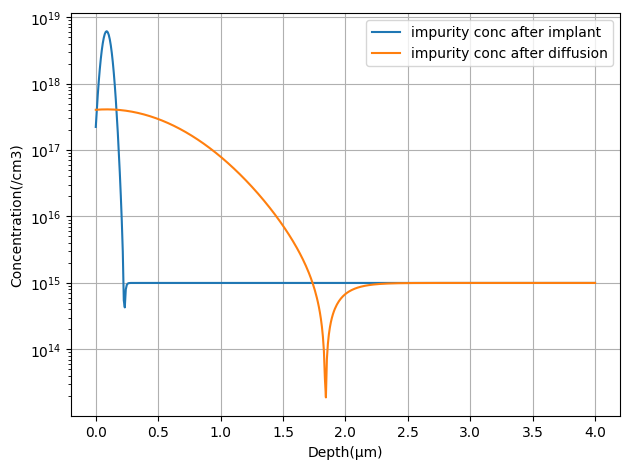

In [45]:
### Source; Phosphorus
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,e_ox
import numpy as np, matplotlib.pyplot as plt

# Phosphorus implantation
E=70; 
Q=5.2e13 # #/cm2
NB=1e15 

# Boron
Rp_B=(51.051+32.60883*E-0.03837*E**2+3.758e-5*E**3-1.433e-8*E**4)*1e-8
DRp_B=(185.34201+6.5308*E-0.01745*E**2+2.098e-5*E**3-8.884e-9*E**4)*1e-8
# Bf2
Rp_BF=(5.544e-10*E**3-3.670e-7*E**2+7.076e-4*E+9.900e-3)*1e-4
DRp_BF=(9.200e-10*E**3-9.591e-7*E**2+4.133e-4*E+2.702e-3)*1e-4
# Phosphorus
Rp_P=(-7.14745+12.33417*E+0.00323*E**2-8.086e-6*E**3+3.766e-9*E**4)*1e-8
DRp_P=(24.39576+4.93641*E-0.00697*E**2+5.858e-6*E**3-2.024e-9*E**4)*1e-8
# As
Rps_As=(58.87725+5.11177*E+0.0008995*E**2+1.173e-7*E**3-3.344e-10*E**4)*1e-8
DRp_As=(22.12602+1.91541*E-0.0008444*E**2+5.637e-7*E**3-2.322e-10*E**4)*1e-8
# change Rp, DRp below.
Rp=Rp_P
DRp=DRp_P
print("Rp(um)=%0.3fum, DRp=%0.3fum" % (Rp*1e4,DRp*1e4))

# Diffusion Temp=DegreeC, Time=min 
# well drive-in, jfet drive-in
Do_B=0.76; Ea_B=3.46 #Do cm2/sec, Ea eV
Do_P=3.85; Ea_P=3.66
Do_As=22.9; Ea_As=4.10

T1=1175; time1=0
T2=1100; time2=150
D_B1=Do_B*np.exp(-Ea_B/(k*(T1+273)))
D_B2=Do_B*np.exp(-Ea_B/(k*(T2+273)))
D_P1=Do_P*np.exp(-Ea_P/(k*(T1+273)))
D_P2=Do_P*np.exp(-Ea_P/(k*(T2+273)))
D_As=Do_As*np.exp(-Ea_As/(k*(T1+273)))
# change D_T1, D_T2 below.
D_T1=D_P1
D_T2=D_P2
print("D_T1=%0.3ecm2/sec, D_T2=%0.3ecm2/sec" % (D_T1,D_T2))

Dt1=D_T1*time1*60 #cm2/sec*min*60
Dt2=D_T2*time2*60 #cm2/sec*min*60
Dt=Dt1 + Dt2
DRp_diff=np.sqrt(DRp**2+2*Dt)
Cpeak=Q/(np.sqrt(2*np.pi)*DRp)
print("Cpeak=%0.3e/cm3" % (Cpeak))

x_cm=np.linspace(0,4,500) * 1e-4  # cm (0~4 μm)
x_um=x_cm*1e4  # cm to μm for plot
n_imp=abs(Q/(np.sqrt(2*np.pi)*DRp)*np.exp(-(x_cm-Rp)**2/(2*DRp**2))-NB)
n_diff=abs(Q/(np.sqrt(2*np.pi)*DRp_diff)*np.exp(-(x_cm-Rp)**2/(2*DRp_diff**2))-NB)

# 1. Surface concentration at x = 0
Cs_imp=n_imp[0]
Cs_diff=n_diff[0]
print("Cs_imp=%0.3ecm-3, Cs_diff=%0.3ecm-3" % (Cs_imp,Cs_diff))

# 2. Junction depth (where n_diff ≈ NB)
junction_index = np.where(n_diff <= NB)[0]
if junction_index.size > 0:
    junction_depth_um = x_um[junction_index[0]]
    print(f"Xj: {junction_depth_um:.3f}μm")
else:
    print("Junction depth not found (n_diff > NB everywhere)")

# 3. max concentration
max_conc_imp = np.max(n_imp)
max_conc_diff = np.max(n_diff)
print(f"max_conc_imp:{max_conc_imp:.3e}/cm3, max_conc_diff:{max_conc_diff:.3e}/cm3")

plt.semilogy(x_um, n_imp, label="impurity conc after implant")
plt.semilogy(x_um, n_diff, label="impurity conc after diffusion")
plt.xlabel("Depth(μm)"), plt.ylabel("Concentration(/cm3)")
plt.grid(True), plt.legend(), plt.tight_layout()
plt.show()